# Message Filtering

In [1]:
from at_nlp.filters.string_filter import StringFilter
from at_nlp.filters.preprocessor_stack import PreprocessorStack
from pathlib import Path
from functools import partial
from snorkel.labeling import labeling_function
import pandas as pd
import numpy as np
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler
from dask.diagnostics import ProgressBar
from dask.diagnostics import visualize
from dask.distributed import LocalCluster
from dask.distributed import Client

In [2]:
stack = PreprocessorStack()

In [3]:
def make_lower_case(ds: pd.Series, position: int) -> pd.Series:
    s: str = ds.iat[position]
    ds.iat[position] = s.lower()
    return ds

In [4]:
stack.append(make_lower_case)

In [5]:
print(stack)

             Preprocessor Callstack             
┏━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Function        ┃ Type               ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ make_lower_case │ <class 'function'> │
└───────┴─────────────────┴────────────────────┘

In [7]:
x = [1, 2, 3, 4, 5]

In [12]:
x.insert(1, 'a')
x

[1, 'a', 2, 'a', 3, 4, 5, 2, 'a']

In [6]:
num_processors = 10
cluster = LocalCluster(n_workers=num_processors)          # Fully-featured local Dask cluster
client = cluster.get_client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 20,Total memory: 36.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:49294,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 20
Started: Just now,Total memory: 36.00 GiB
Comm: tcp://127.0.0.1:49317,Total threads: 2
Dashboard: http://127.0.0.1:49319/status,Memory: 3.60 GiB
Nanny: tcp://127.0.0.1:49297,


In [ ]:
%load_ext rich

In [ ]:
data_path = Path("/home/dwalker/SIGIL/natural_language_processing/nitmre/data/(CUI) alexa_816th_file_1a1.csv")
assert data_path.exists(), f"Data path {data_path} does not exist"
data = pd.read_csv(data_path)

In [ ]:
sf.register_preprocessor([(0, fn)])
sf.register_csv_preprocessor(data_path, idx)
sf.register_csv_preprocessor(data_path2, idx)

sf.csv_name_data = dict()
sf.csv_name_data2 = dict()
sf.data.extend(csv_name, csv_name2)

In [ ]:
sf = StringFilter()
sf.reset()

In [ ]:
def lower_case(ds: pd.Series, col_idx: int):
    _s: str = ds.iat[col_idx]
    _s = _s.lower()
    ds.iat[col_idx] = _s
    return ds

def upper_case(ds: pd.Series, col_idx: int):
    _s: str = ds.iat[col_idx]
    _s = _s.upper()
    ds.iat[col_idx] = _s
    return ds


pre_processors = [
    (1, lower_case),
    (0, upper_case)
]

sf.register_preprocessor(pre_processors)

In [ ]:
sf.print_preprocessor_stack()

In [13]:
test_csv_path = Path("../../tests/test.csv")

In [15]:
df2 = pd.read_csv(test_csv_path)

In [19]:
col_name = df2.columns[0]

In [26]:
type(df2[col_name][0])

str

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  3 non-null      object
 1   Target  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [30]:
stack.add_csv_preprocessor(test_csv_path)
print(stack)

[11:21:50] Registering CSV for preprocessing: test                                        ]8;id=38880;file:///Users/dalton/dev/at_nlp/at_nlp/filters/preprocessor_stack.py\preprocessor_stack.py]8;;\:]8;id=862568;file:///Users/dalton/dev/at_nlp/at_nlp/filters/preprocessor_stack.py#135\135]8;;\

           CSV registered successfully at callstack position: 1!                          ]8;id=886913;file:///Users/dalton/dev/at_nlp/at_nlp/filters/preprocessor_stack.py\preprocessor_stack.py]8;;\:]8;id=566756;file:///Users/dalton/dev/at_nlp/at_nlp/filters/preprocessor_stack.py#178\178]8;;\

              Preprocessor Callstack              
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Function          ┃ Type               ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ make_lower_case   │ <class 'function'> │
├───────┼───────────────────┼────────────────────┤
│ 1     │ test_preprocessor │ <class 'function'> │
└───────┴───────────────────┴────────────────────┘

In [28]:
test_arr = [[idx, f"test{idx}"] for idx in range(10_000)]

csv_indices = np.random.randint(low=1, high=10000, size=(200,))

for idx in csv_indices:
    test_arr[idx] = [idx, "APL"]

test_df = pd.DataFrame(
    test_arr,
    columns=["id", "text"],
)

In [29]:
test_df.head(10)

,id,text
0,0,test0
1,1,test1
2,2,test2
3,3,test3
4,4,test4
5,5,test5
6,6,test6
7,7,test7
8,8,test8
9,9,test9


In [36]:
num_divisions = 10

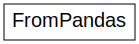

In [37]:
stack(test_df, 1, True, num_divisions).visualize()

In [42]:
stack(test_df, 1, True, num_divisions).compute('threads')

,id,text
0,0,test0
1,1,test1
2,2,test2
3,3,test3
4,4,test4
...,...,...
9995,9995,test9995
9996,9996,test9996
9997,9997,test9997
9998,9998,test9998


In [ ]:
out_df.head(100)

In [ ]:
%timeit sf.preprocess(test_df, 1, False, num_divisions, False)

## Train

In [ ]:
msg_filter.train(
    data, 
    {
        "stage-one": {
            "split": 0.9,
            "amt": 2000
        },
        "stage-two": {
            "split": 0.9,
            "amt": 1700
        }
    }, 
    serialize=False
)

In [ ]:
row_apply = partial(msg_filter.template_miner_transform, tm=msg_filter.template_miner)

In [ ]:
test_set = msg_filter.stage_one_test_data
test_labels = test_set["labels"]

In [ ]:
msg_filter.latency_trace(test_set)

### Test Stage One

In [ ]:
msg_filter.evaluate(test_set, test_labels, "rf")
msg_filter.evaluate(test_set, test_labels, "mlp")

## Label Ensemble

### Data Preparation

In [ ]:
test_set = msg_filter.stage_two_test_data
test_labels = test_set["labels"]
test_set = msg_filter.applier.apply(test_set)

### Test Ensemble

In [ ]:
msg_filter.evaluate(test_set, test_labels, "label_model")

In [ ]:
ds = data[:5]
msg_filter.predict(ds)

In [ ]:
@labeling_function()
def lf_confirmation(in_ds: pd.Series) -> int:
    msg = in_ds["Message"]
    msg = msg.lower()
    if "wilco" in msg or "affirm" in msg or "ok" in msg:
        return 2
    return 0

In [ ]:
msg_filter.register_new_labeling_fn([lf_confirmation])

In [ ]:
msg_filter.labeling_functions

In [ ]:
msg_filter.train(
    data, 
    {
        "stage-one": {
            "split": 0.9,
            "amt": 2000
        },
        "stage-two": {
            "split": 0.9,
            "amt": 1700
        }
    }, 
    serialize=False
)

In [ ]:
test_set = msg_filter.stage_two_test_data
test_labels = test_set["labels"]
test_set = msg_filter.applier.apply(test_set)
msg_filter.evaluate(test_set, test_labels, "label_model")

In [86]:
def test_function(ds: pd.Series, i: int) -> pd.Series:
    print(locals()['ds'])

In [87]:
test_function(pd.Series([0, 0,]), 0)

0    0
1    0
dtype: int64


In [58]:
import inspect

In [73]:
dir(test_function.__code__)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'co_argcount',
 'co_cellvars',
 'co_code',
 'co_consts',
 'co_filename',
 'co_firstlineno',
 'co_flags',
 'co_freevars',
 'co_kwonlyargcount',
 'co_lines',
 'co_linetable',
 'co_lnotab',
 'co_name',
 'co_names',
 'co_nlocals',
 'co_posonlyargcount',
 'co_stacksize',
 'co_varnames',
 'replace']

In [62]:
inspect.getargs(test_function.__code__.co_code)

Arguments(args=['ds', 'int'], varargs=None, varkw=None)

In [82]:
test_function.__code__.co_linetable.decode('utf-8')

'\x12\x01'

In [65]:
test_function.__code__.co_varnames[0]

'ds'

In [66]:
for v in test_function.__code__.co_varnames:
    print(v)

ds
int


In [69]:
inspect.getargvalues(test_function.__code__)

AttributeError: 'code' object has no attribute 'f_code'

In [70]:
getattr(test_function, 'ds')

AttributeError: 'function' object has no attribute 'ds'

In [72]:
globals()['test_function']

<function __main__.test_function(ds: pandas.core.series.Series, int) -> pandas.core.series.Series>

In [83]:
from typing import get_type_hints

In [88]:
get_type_hints(test_function)

{'ds': pandas.core.series.Series,
 'i': int,
 'return': pandas.core.series.Series}

In [89]:
 test_list = []

In [90]:
test_list.insert(0, "a")
test_list

['a']

In [91]:
test_list.insert(0, "b")
test_list

['b', 'a']

In [92]:
test_list.insert(1, "c")
test_list

['b', 'c', 'a']

In [94]:
test_list.insert(10000, "c")
test_list

['b', 'c', 'c', 'a', 'c']